In [1]:
import warnings 
warnings.filterwarnings('ignore') 
# Importando as bibliotecas necessárias da diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.analytics import Bigquery, Dataflow, Composer, DataFusion
from diagrams.gcp.compute import Functions
from diagrams.gcp.ml import AIPlatform, Automl
from diagrams.gcp.storage import Storage
from diagrams.gcp.database import SQL as gcp_sql
from diagrams.custom import Custom 
from diagrams.generic.blank import Blank  
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage

# https://googlecloudcheatsheet.withgoogle.com/


#  Overview - 1.1

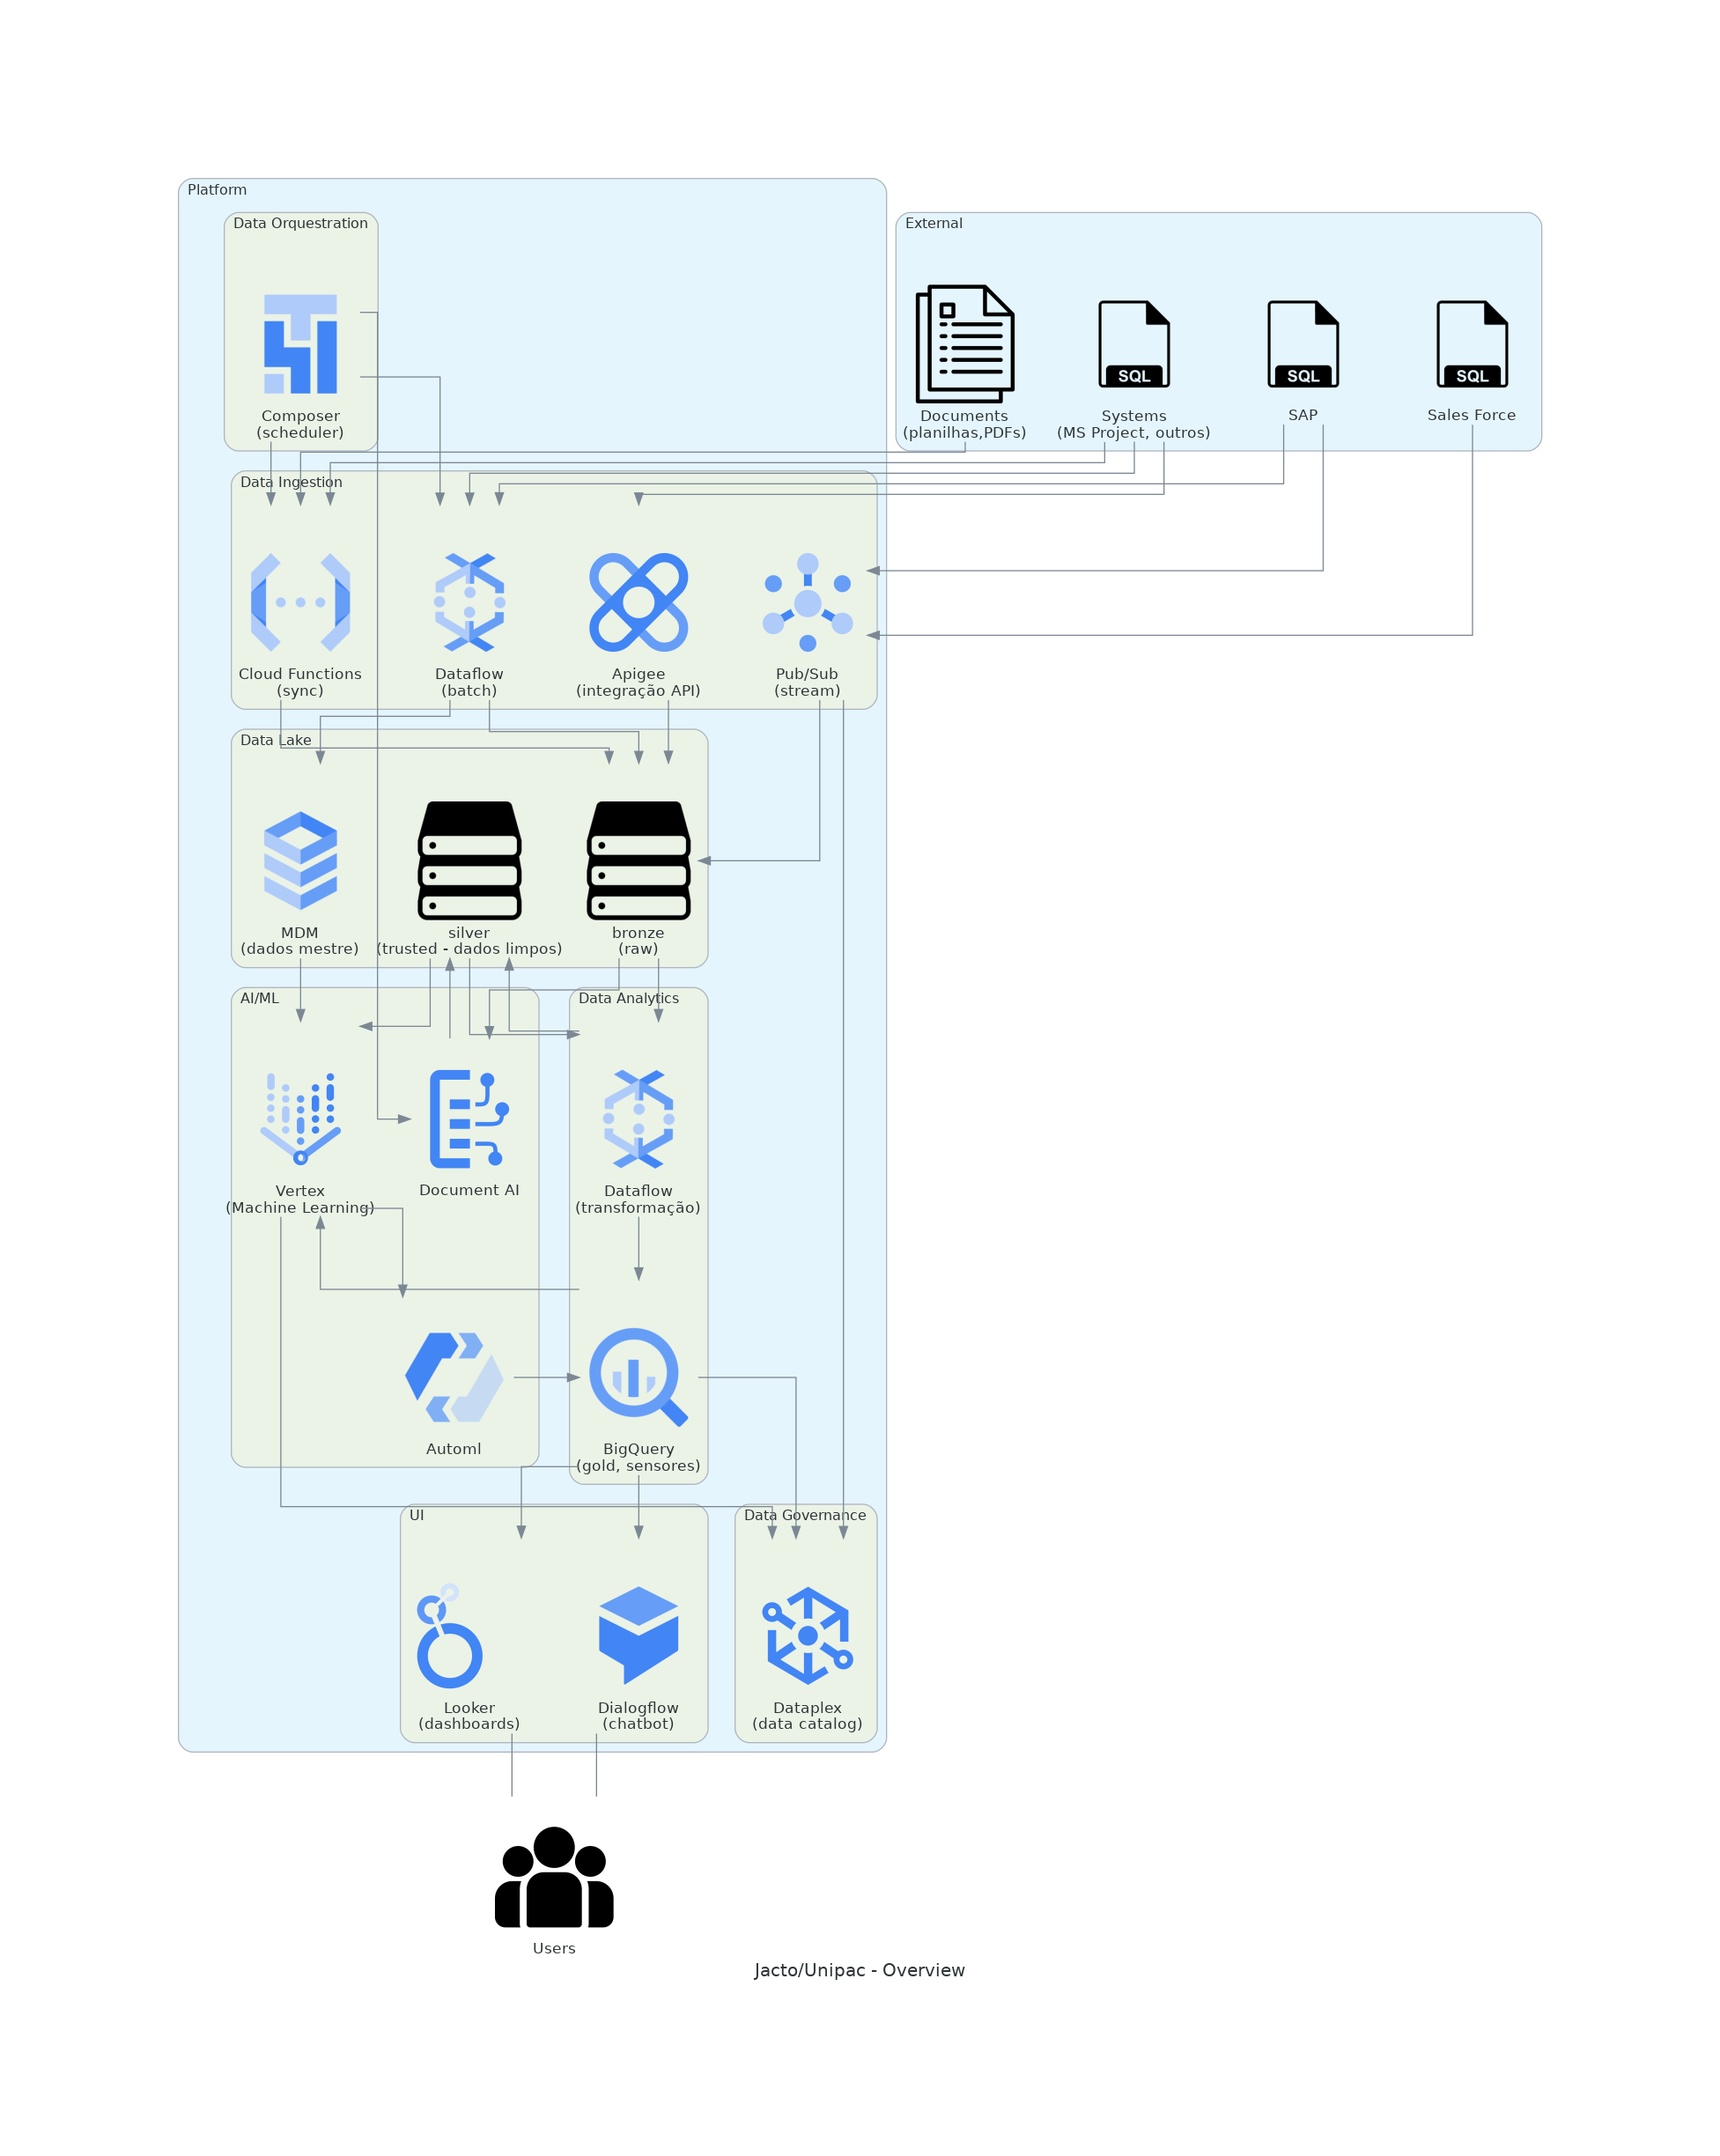

In [2]:
title = "Jacto/Unipac - Overview"
filename = "diagrams/jacto-unipac-overview"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")
  
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold, sensores)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            mdm = gcp_sql("MDM\n(dados mestre)")
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze, mdm]
    
    ## data transformation
    bronze >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    [dialogflow, looker] - users

diag


## Compras

### Proposta 4 - Automação e Padronização de Relacionamento com Fornecedores

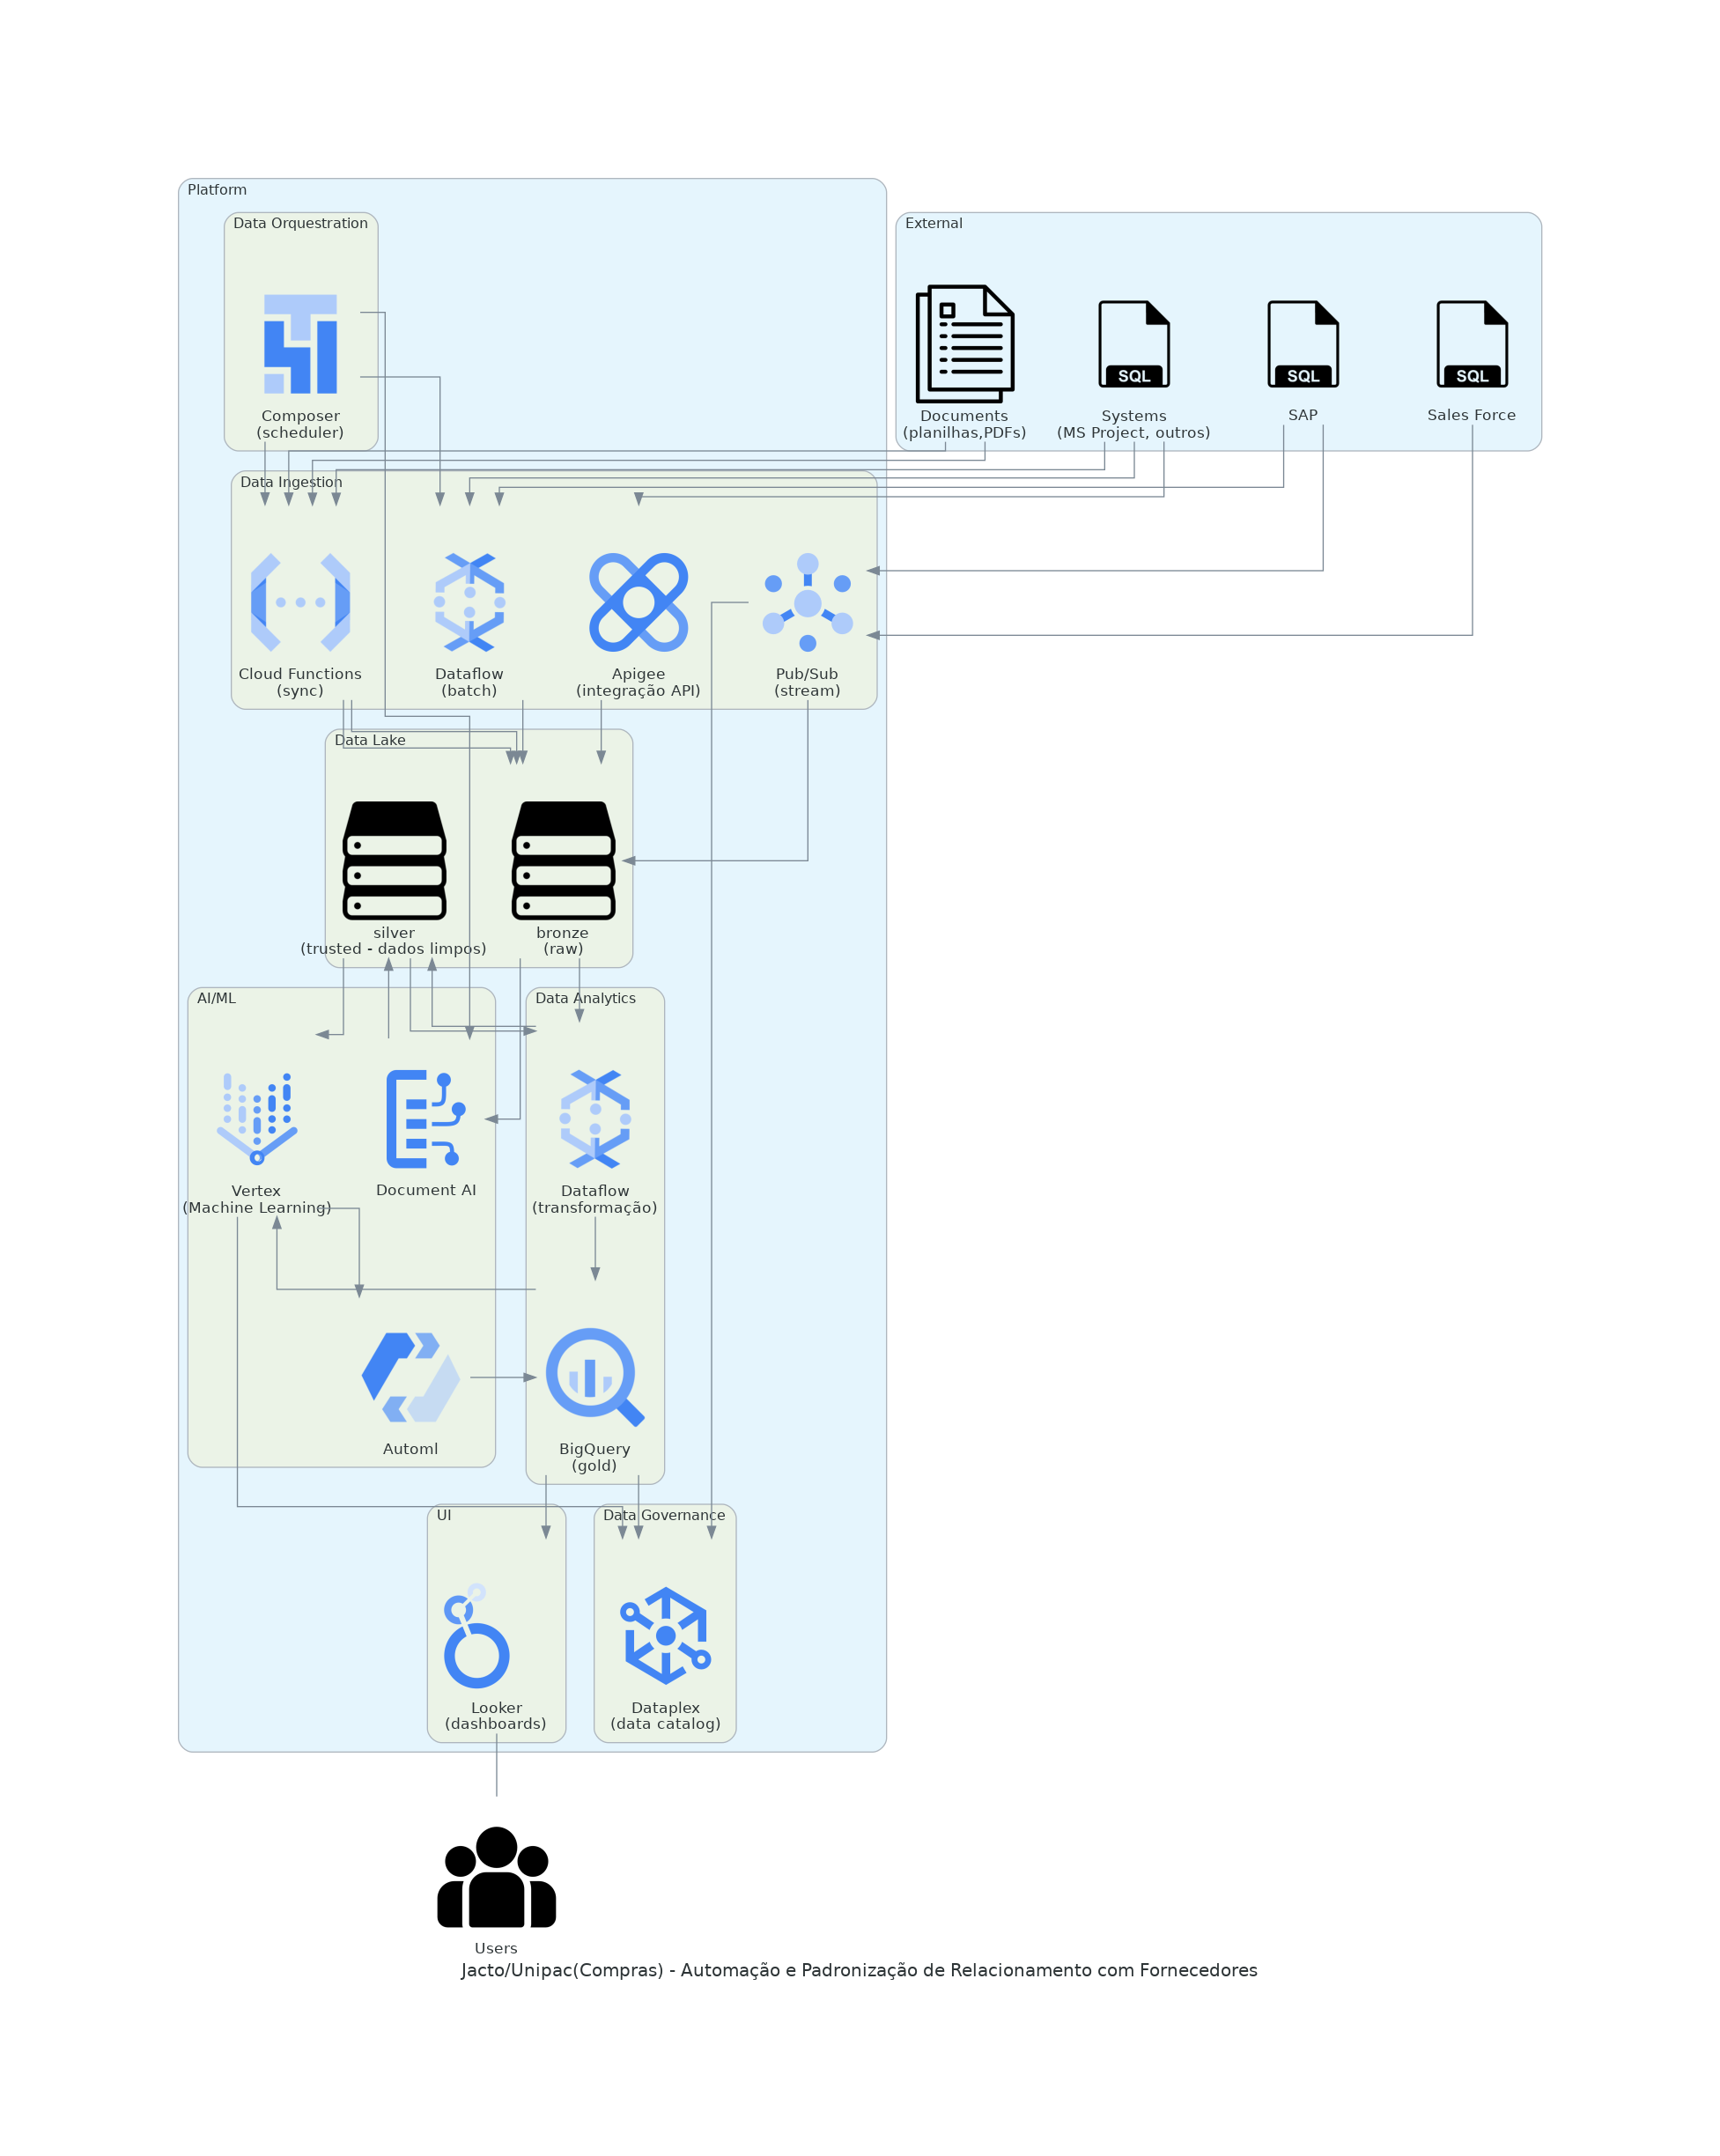

In [3]:
title = "Jacto/Unipac(Compras) - Automação e Padronização de Relacionamento com Fornecedores"
filename = "diagrams/jacto-unipac-compras-proposta4"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")  

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
                   

        with Cluster("Data Governance"):
            
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]
    documents >> sync >> bronze


    ## data transformation
    bronze >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

 # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag



### Proposta 2 - Gestão Preventiva e Automação de Materiais Indiretos


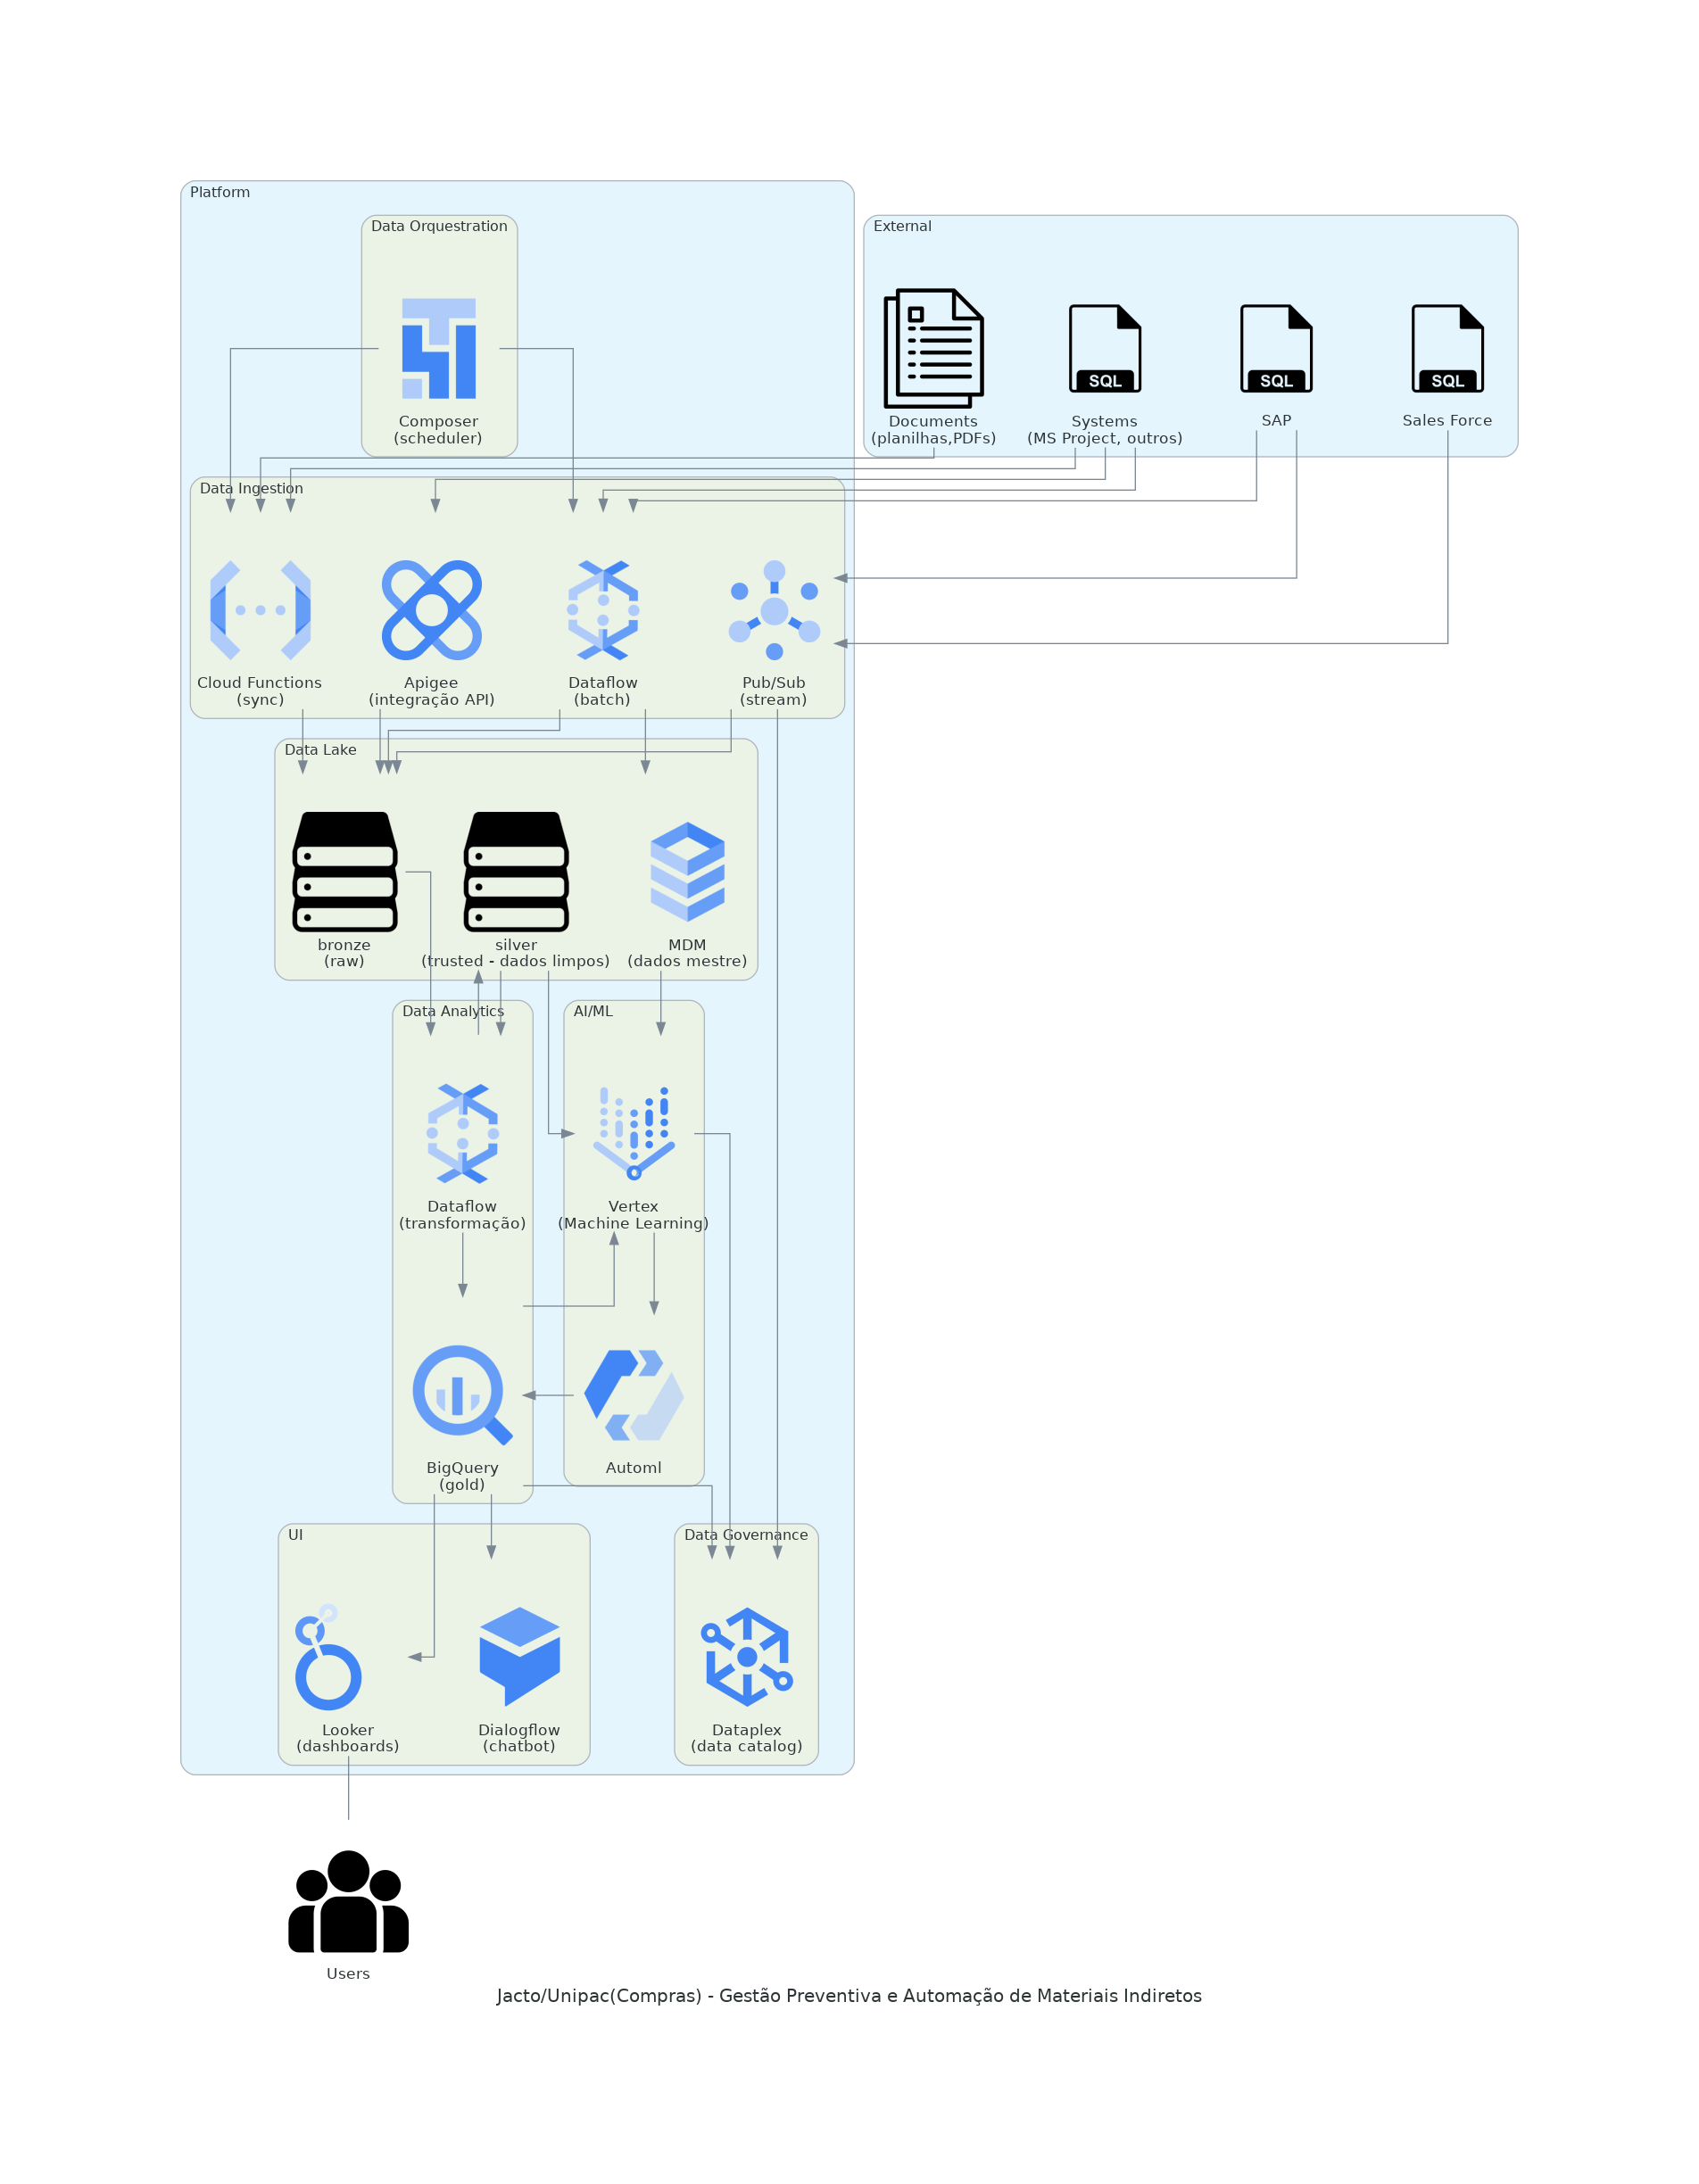

In [4]:
title = "Jacto/Unipac(Compras) - Gestão Preventiva e Automação de Materiais Indiretos"
filename = "diagrams/jacto-unipac-compras-proposta2"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")         
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")                          

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            mdm = gcp_sql("MDM\n(dados mestre)")
            
        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze, mdm]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users
diag


### Proposta 1 - Plataforma de Inteligência de Preços e Cotação


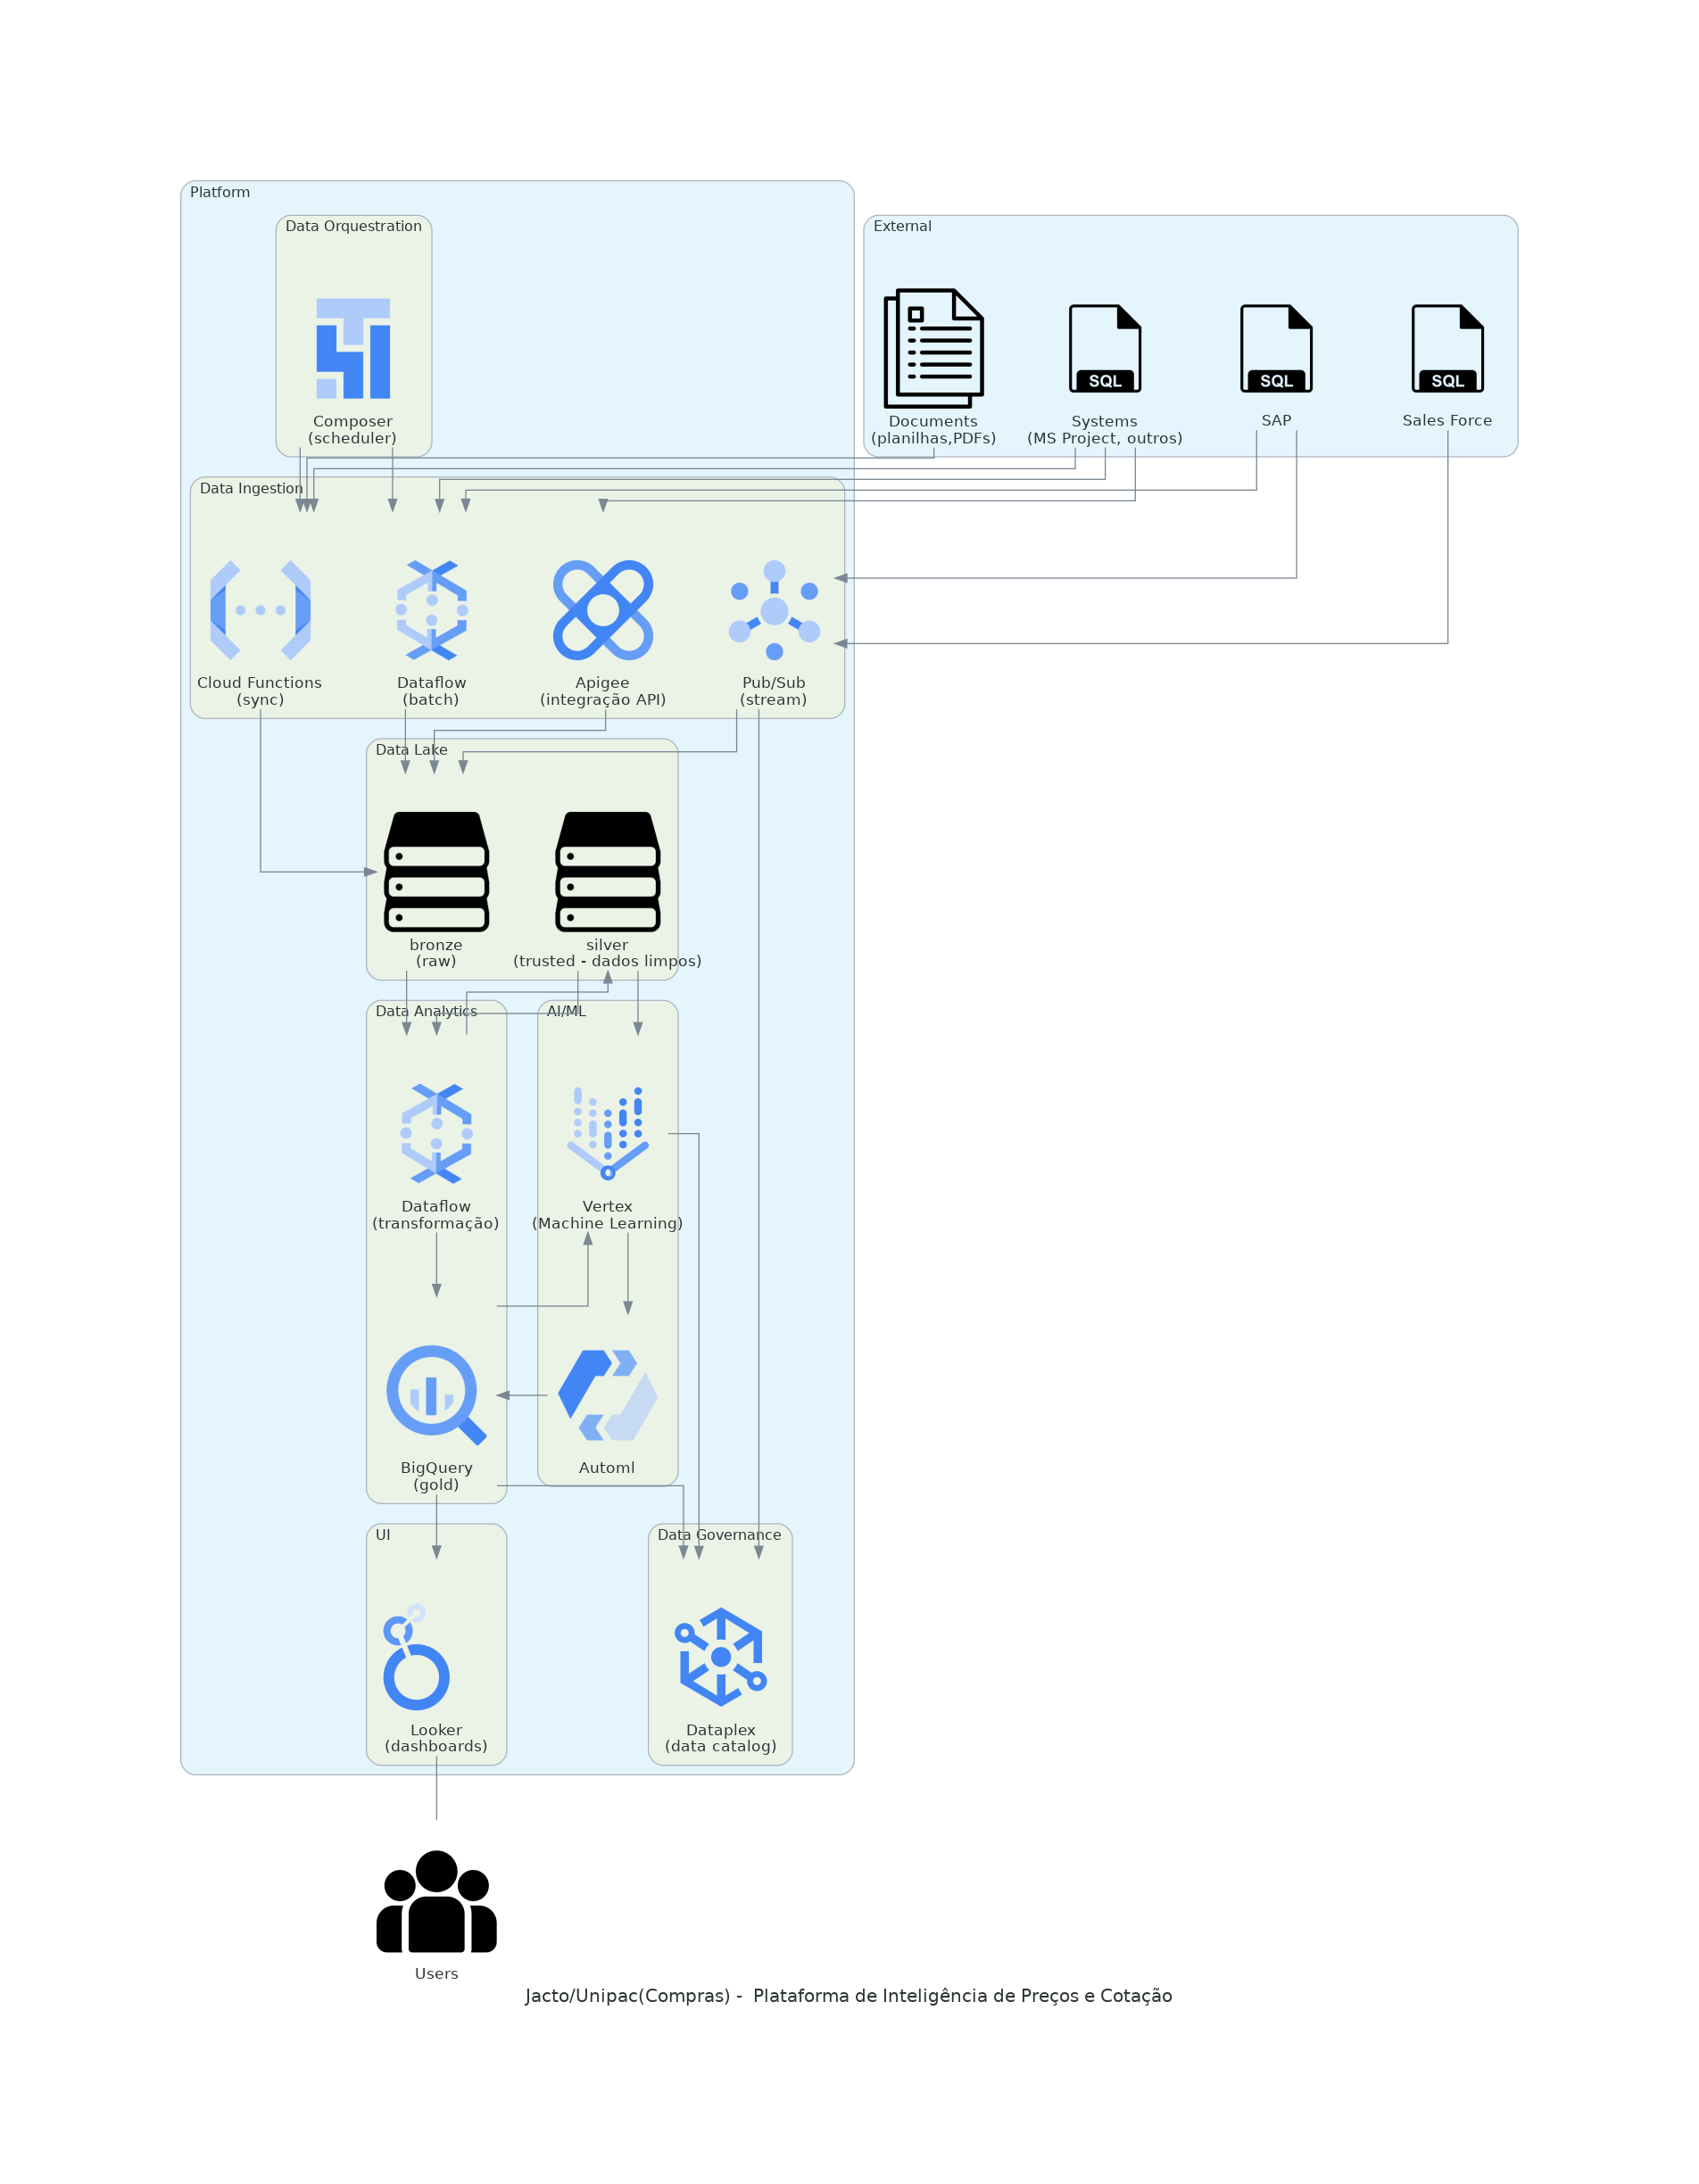

In [5]:
title = "Jacto/Unipac(Compras) -  Plataforma de Inteligência de Preços e Cotação"
filename = "diagrams/jacto-unipac-compras-proposta1"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")         
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


## S&OP

### Proposta 8 - S&OP Integrado e Logística Inteligente


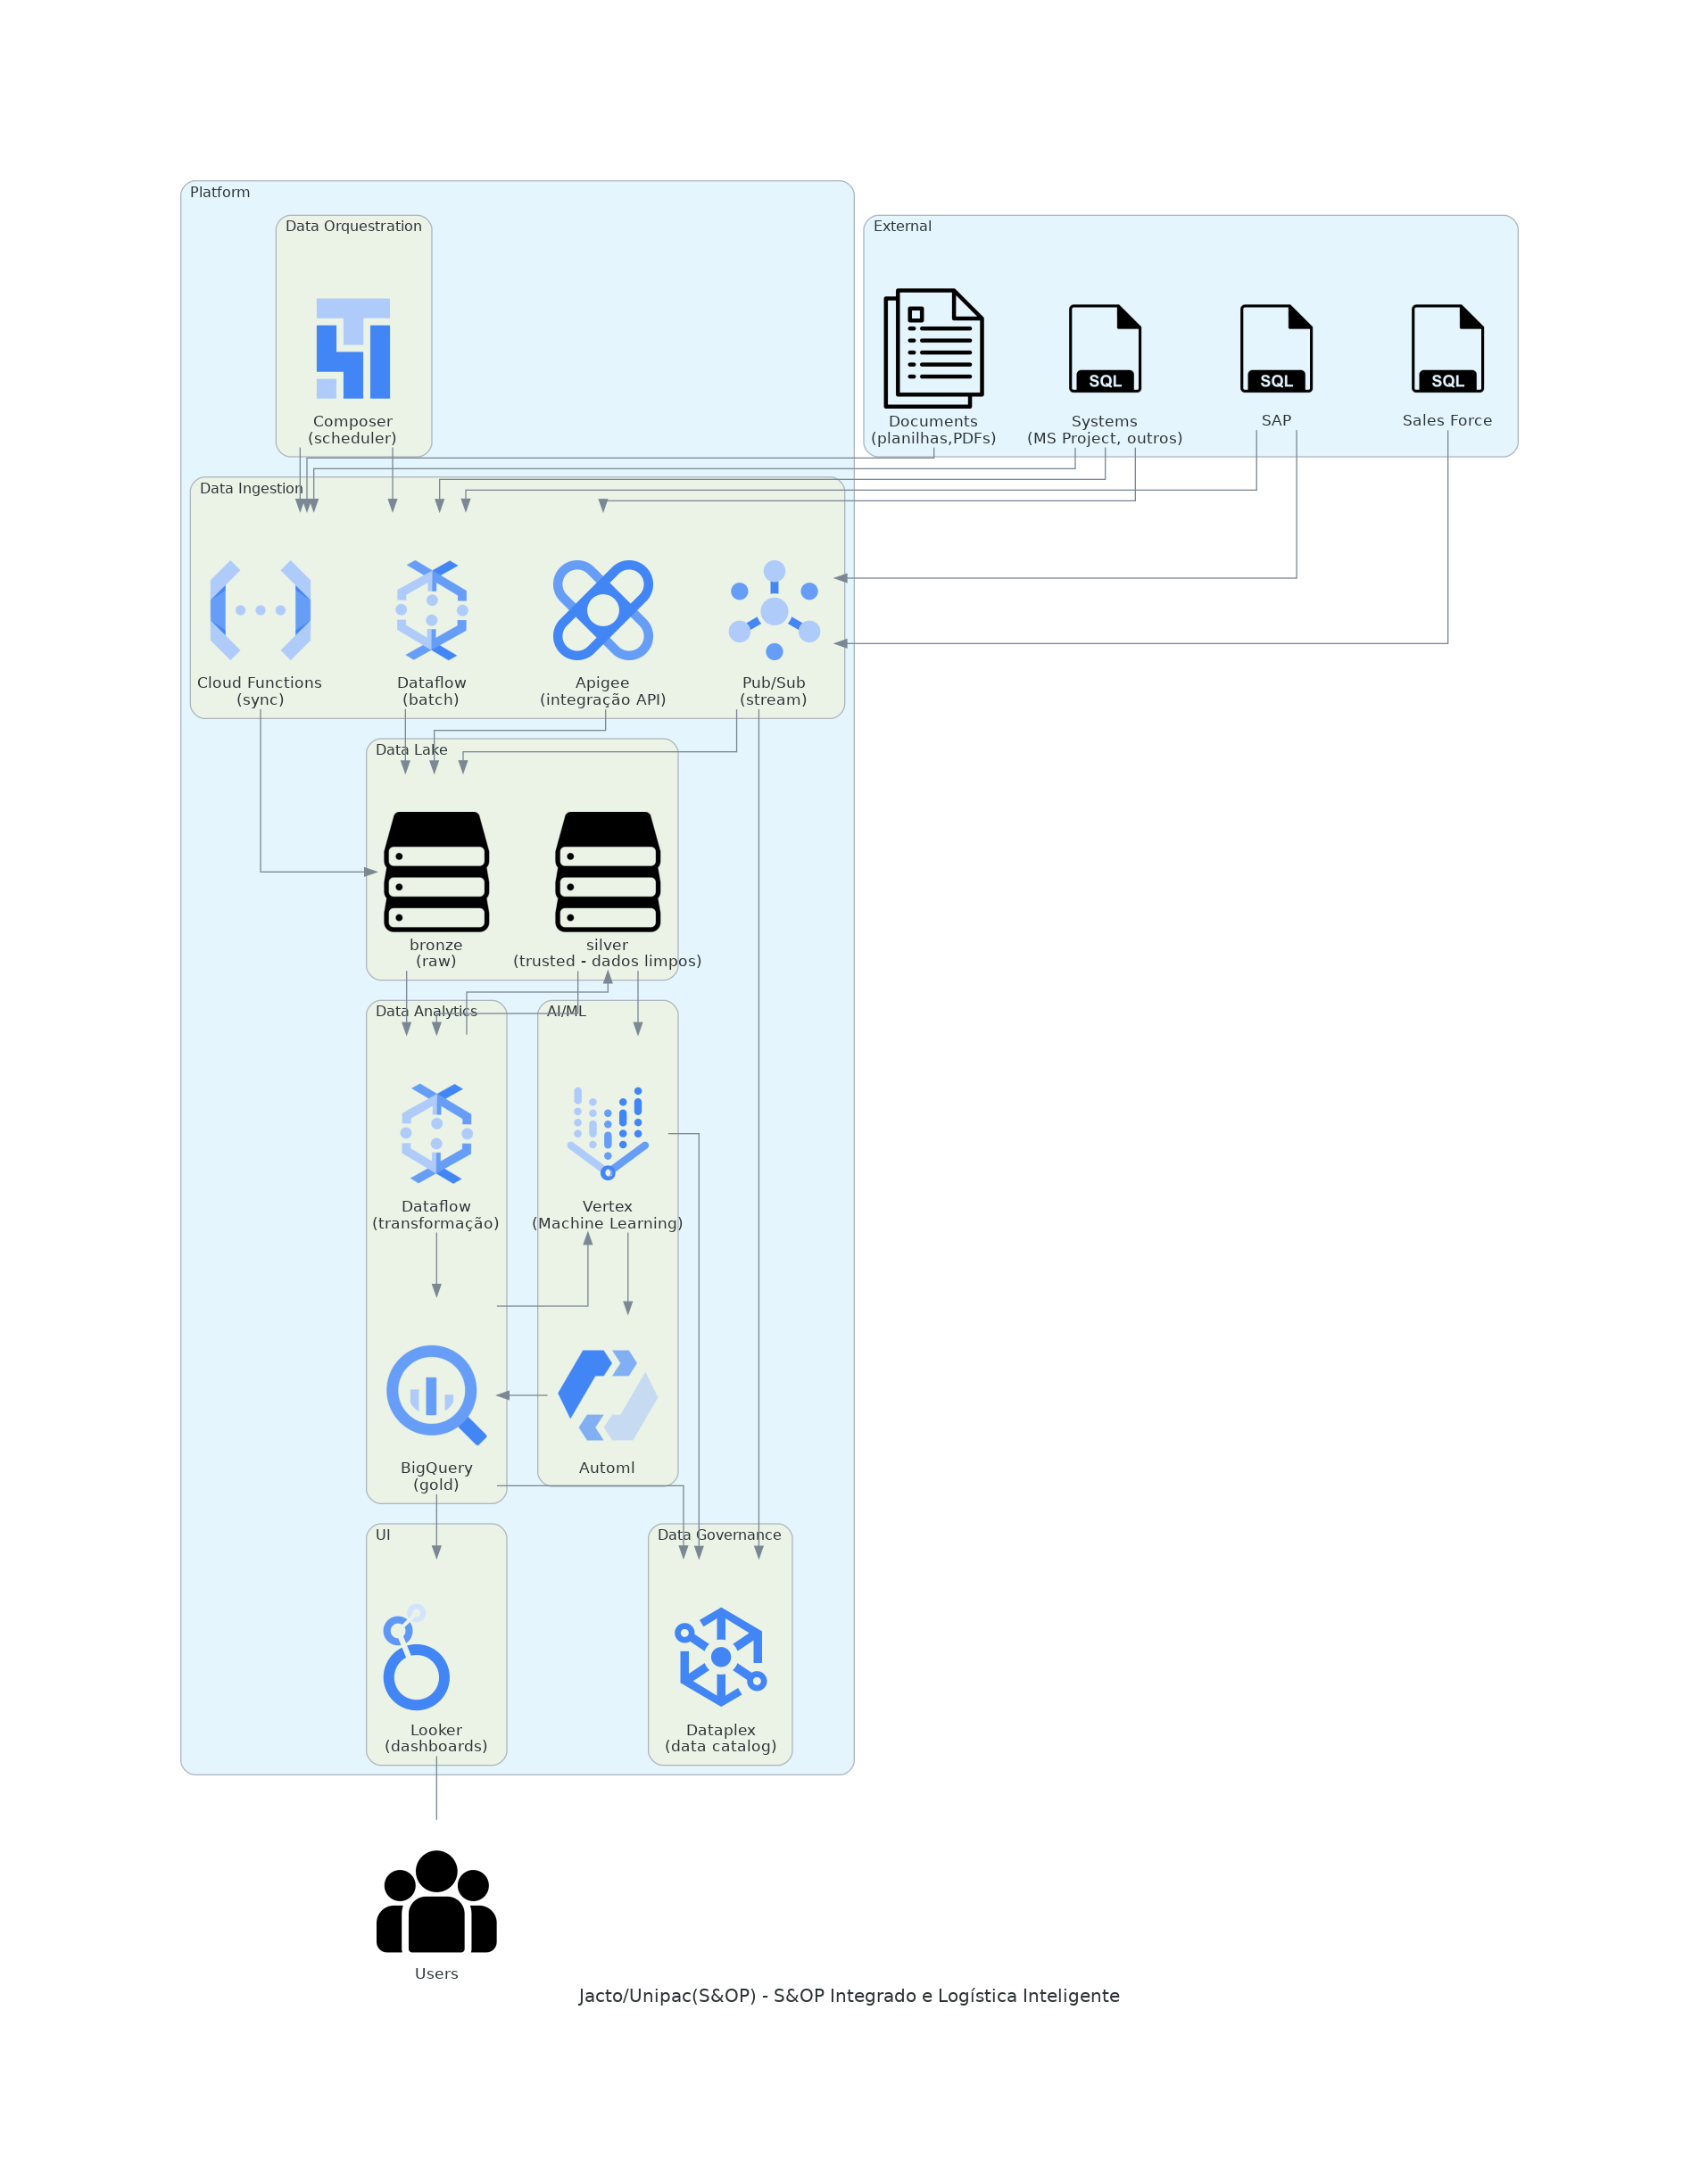

In [6]:
title = "Jacto/Unipac(S&OP) - S&OP Integrado e Logística Inteligente"
filename = "diagrams/jacto-unipac-sop-proposta8"


# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


## Centralidade do Cliente

### Proposta 7 - Plataforma Centralizada de Relacionamento e Pós-Venda

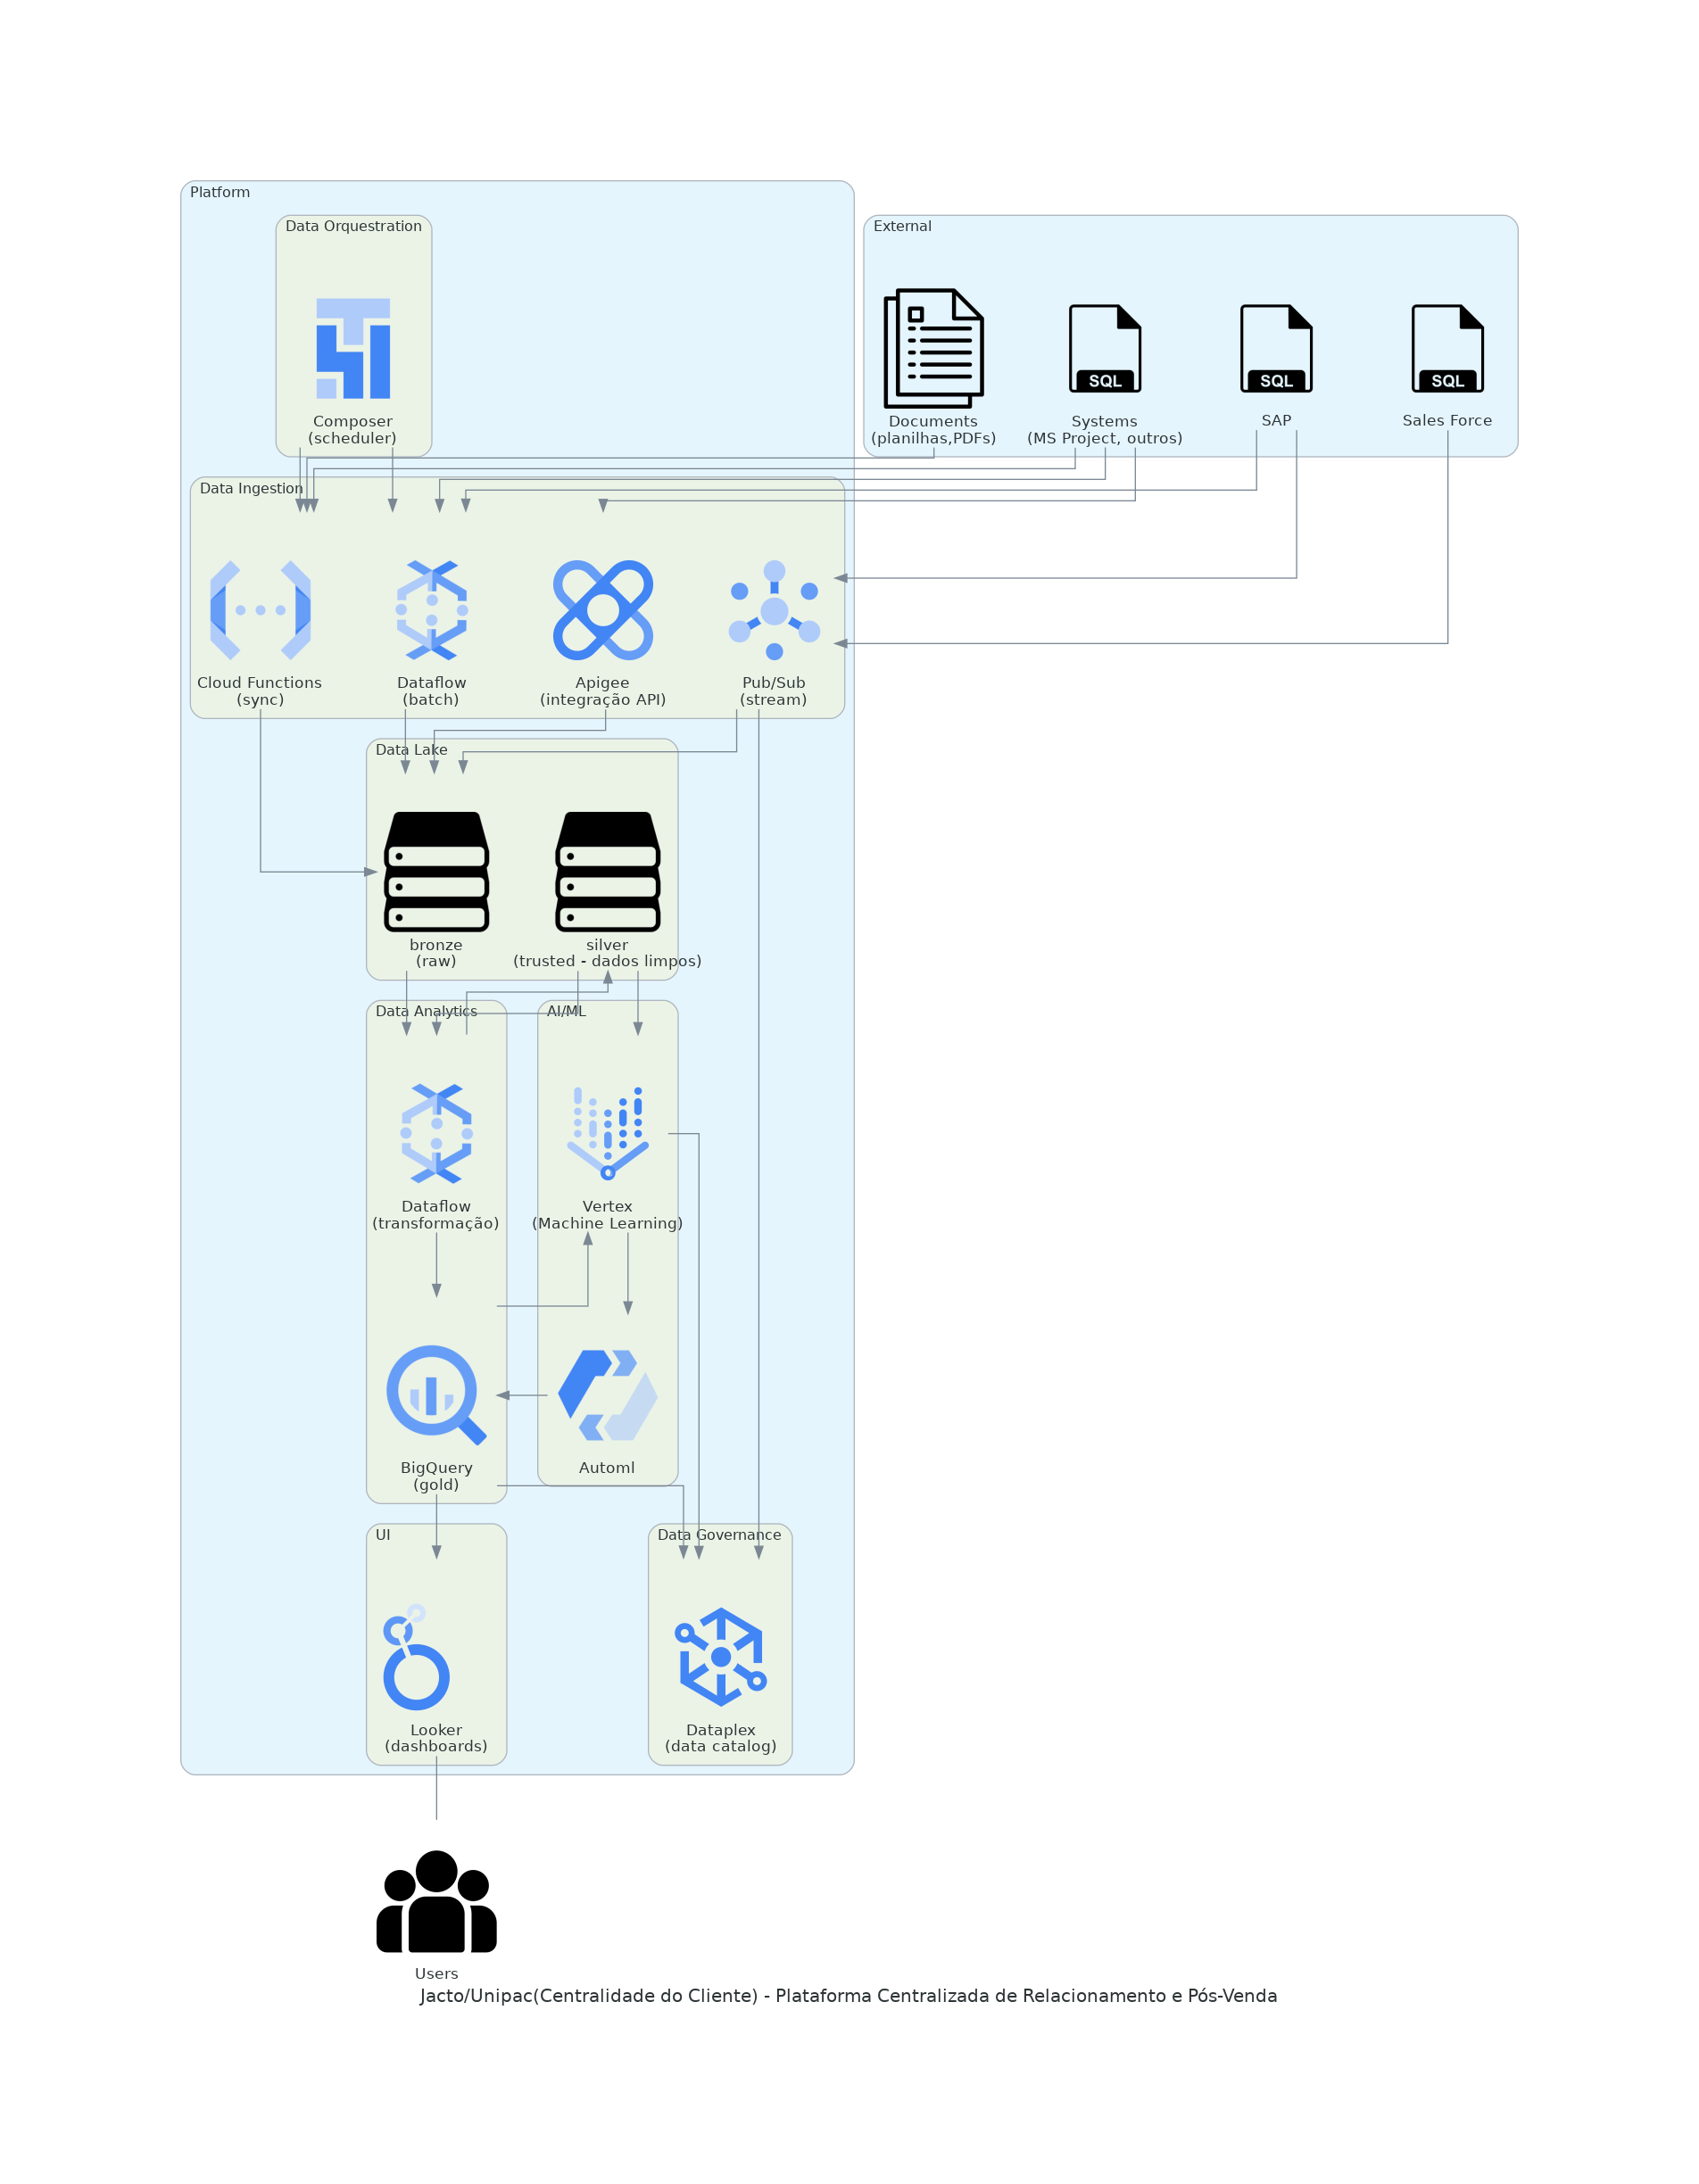

In [7]:
title = "Jacto/Unipac(Centralidade do Cliente) - Plataforma Centralizada de Relacionamento e Pós-Venda"
filename = "diagrams/jacto-unipac-centralidade-proposta7"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Systems\n(MS Project, outros)")           
        documents = Custom("Documents\n(planilhas,PDFs)", "../assets/document.png")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap, external_salesforce] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [documents, external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

## Desenvolvimento de Produto

### Proposta 3 - Inovação e Prototipagem Inteligente


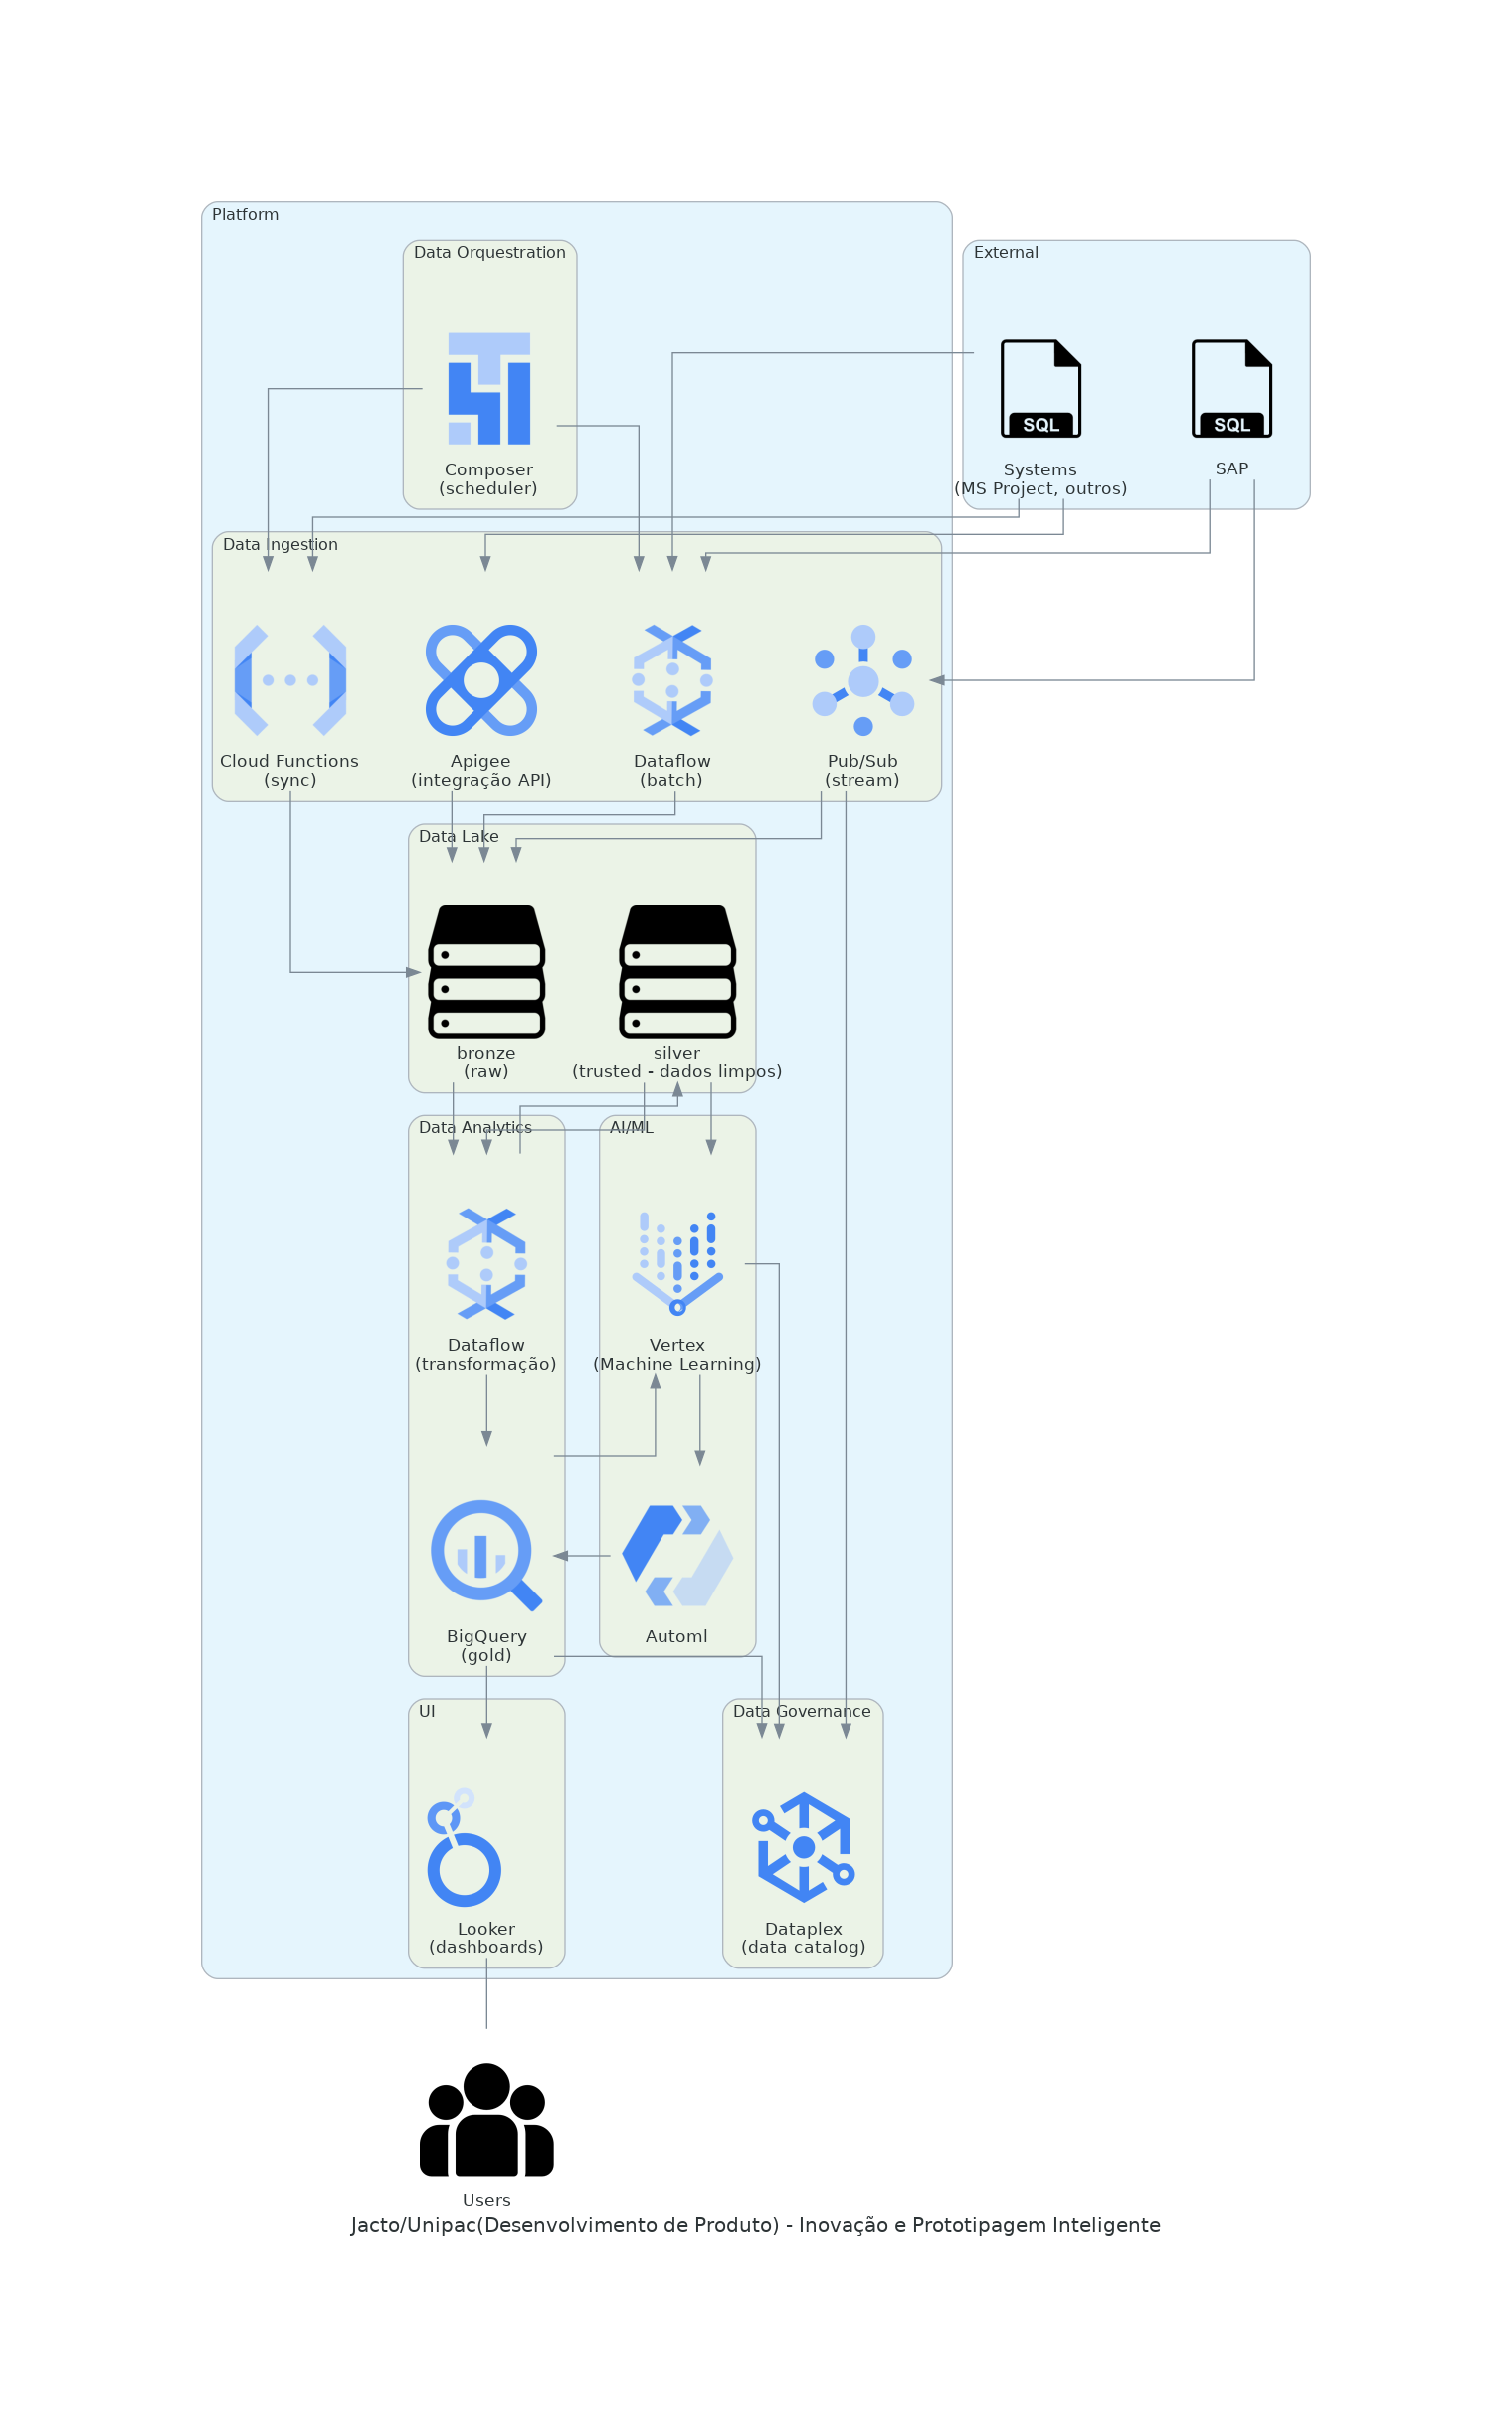

In [8]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Inovação e Prototipagem Inteligente"
filename = "diagrams/jacto-unipac-produto-proposta3"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Systems\n(MS Project, outros)")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]


    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

### Proposta 5 - Automação e Eficiência Operacional


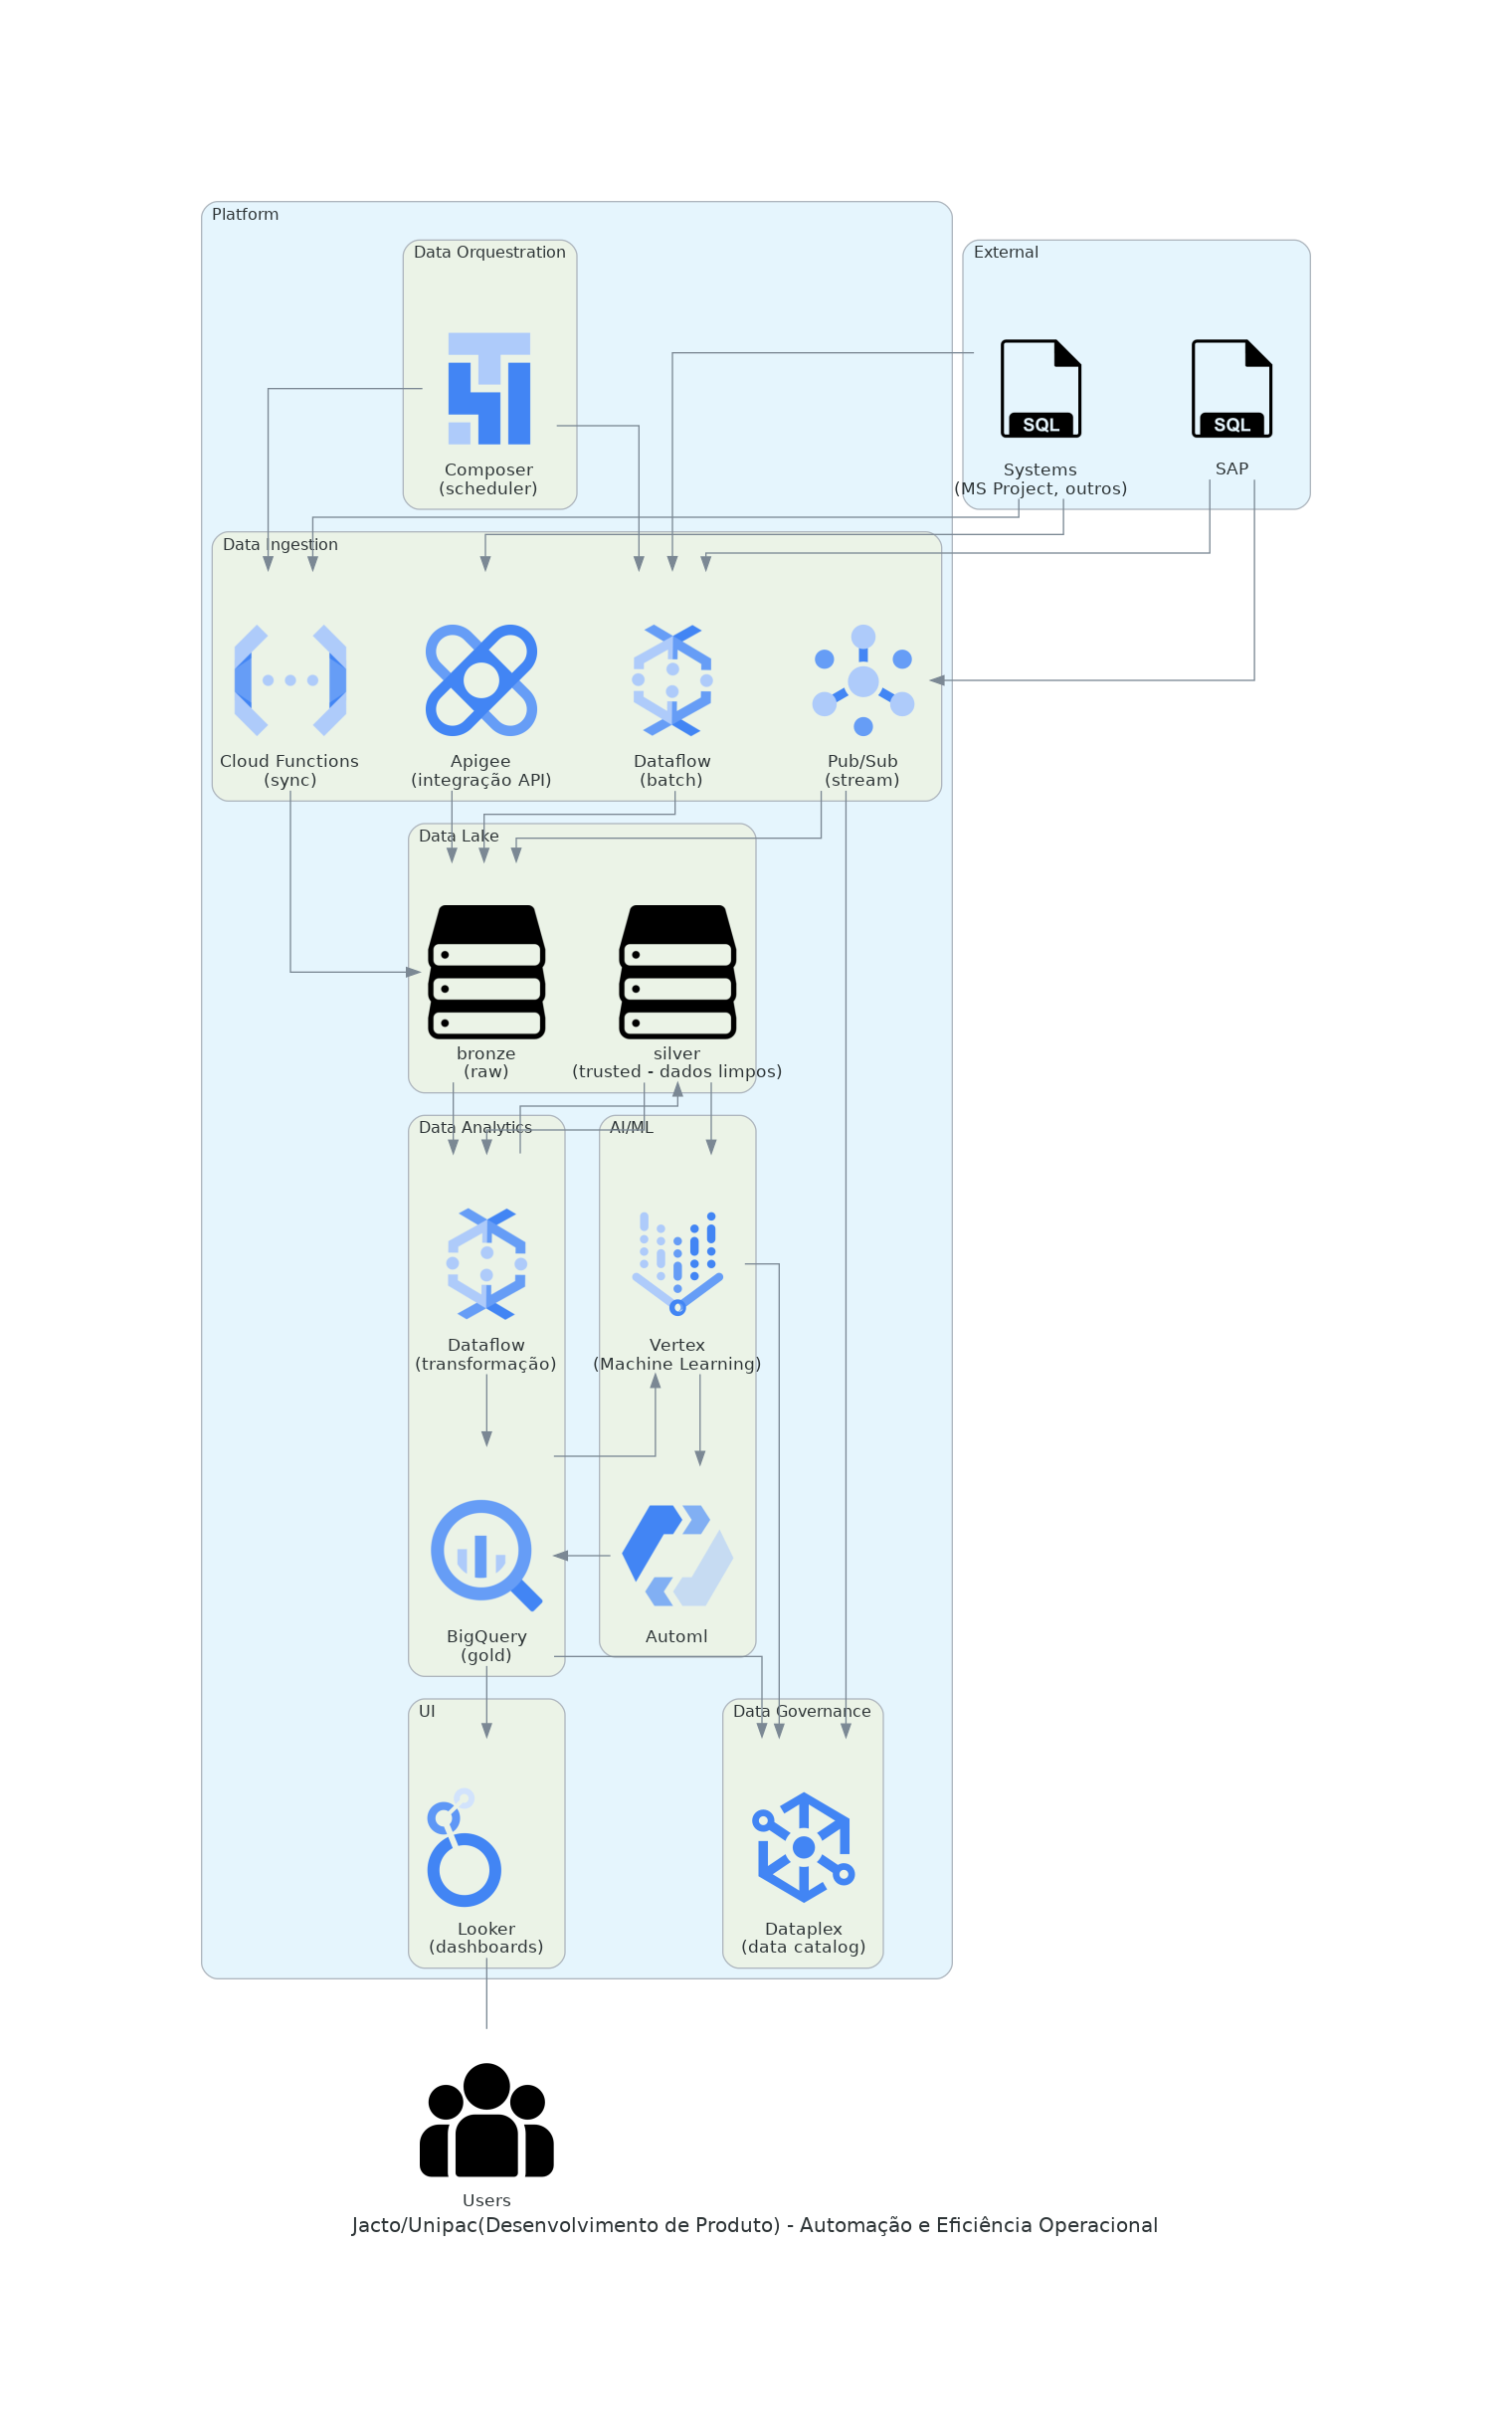

In [9]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Automação e Eficiência Operacional"
filename = "diagrams/jacto-unipac-produto-proposta5"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Systems\n(MS Project, outros)")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub\n(stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow\n(batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee\n(integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex\n(Machine Learning)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    [external_sap] >> stream >> bronze 
    [external_system] >> api_integration >> bronze
    [external_system] >> sync >> bronze
    [external_sap, external_system] >> batch >> [bronze]


    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

### Proposta 6 - Torre de Controle e Gestão de Projetos


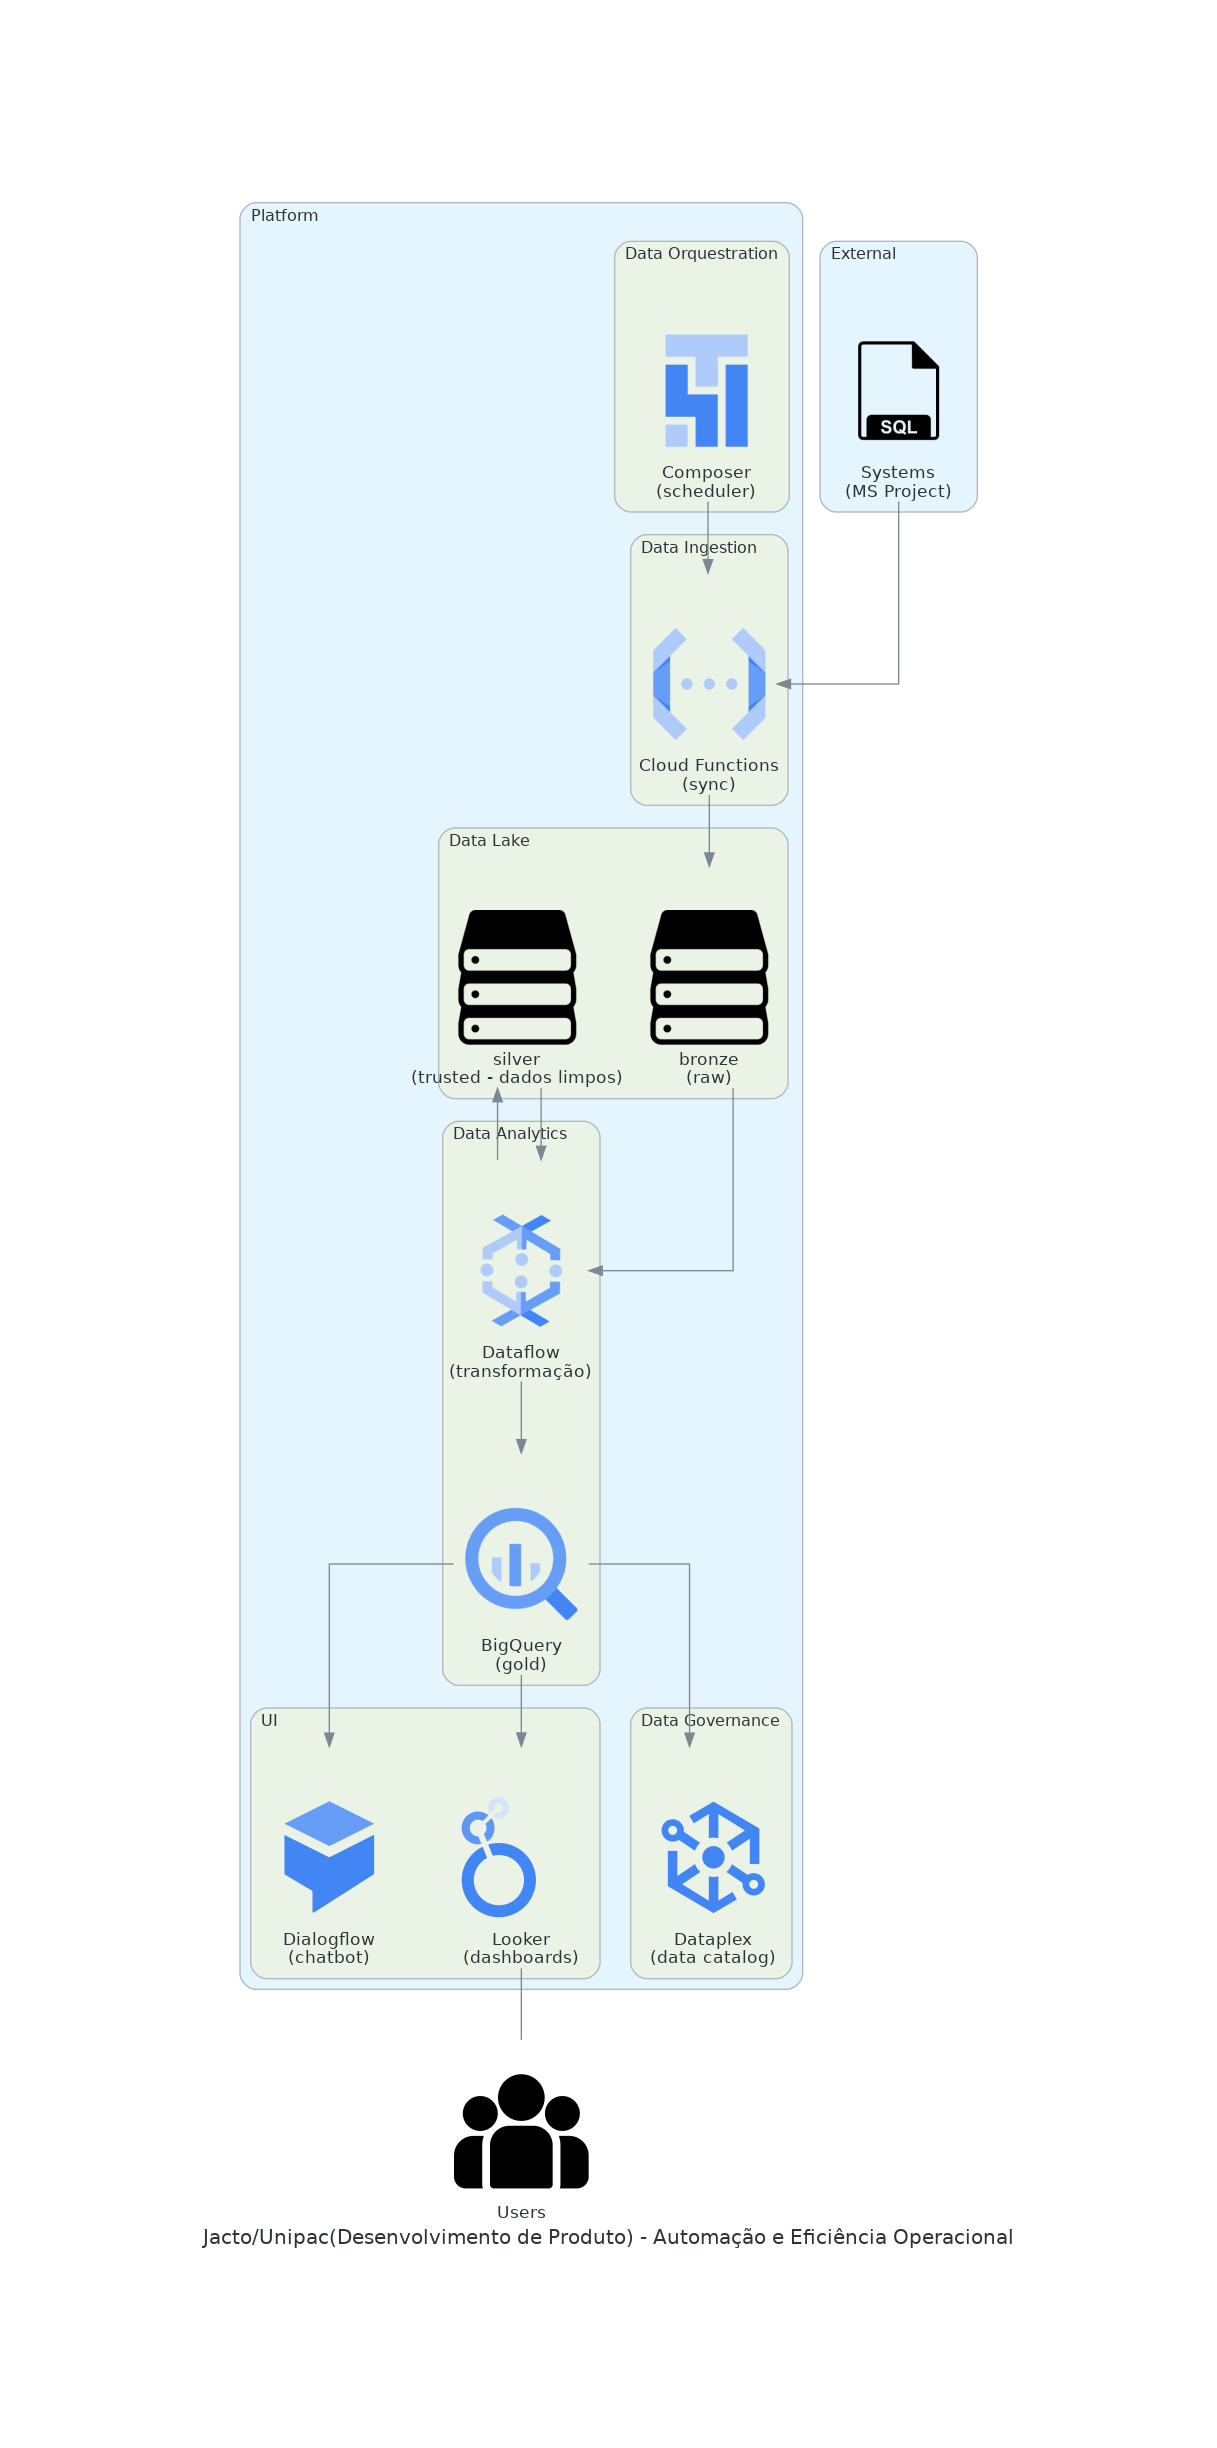

In [10]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Automação e Eficiência Operacional"
filename = "diagrams/jacto-unipac-produto-proposta6"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="TB",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_system = SQL("Systems\n(MS Project)")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions\n(sync)") 
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow\n(transformação)")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery\n(gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer\n(scheduler)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker\n(dashboards)", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow\n(chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Data Lake"): 
            
            bronze = Storage("bronze\n(raw)")   
            silver = Storage("silver\n(trusted - dados limpos)")        

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex\n(data catalog)", "../assets/google-cloud-icons/dataplex/dataplex.png")  

    composer >> [sync]

    ## data ingestion
    [external_system] >> sync >> bronze

    ## data transformation
    bronze >> [dataflow] >> silver
    silver >> dataflow >> gold
    
    
    ## ui
    gold >> looker
    gold >> dialogflow
    
    [vertex, gold, stream] >> datacatalog

    looker - users

diag